# Displacements due to pressure variations in reservoir simulating a Disk-shaped reservoir under non uniform depletion

This code aims at creating the synthetic test 2 simulating a Disk-shaped reservoir under non uniform depletion

The disk-shaped reservoir is composed by two vertically juxtaposed cylinders, each one with a uniform depletion.
The deepest cylinder is uniformly depleted by $\Delta p = -20$ MPa with its top and bottom at, respectively, 800 and 850 m deep.
The shallowest cylinder is uniformly depleted by $\Delta p = -40$ MPa with its top and bottom at, respectively, 750 and 800 m deep.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle

In [2]:
import compaction as cp


In [3]:
# Parameters describing the reservoir

R = 500. #radius of the cylinder 
y0 = 0 # y coordinate of the center
x0 = 0 # x coordinate of the center

# shallowest cylinder
top1 = 750. #reservoir top
bottom1 = 800. #reservoir bottom
h1 = bottom1 - top1 #reservoir thickness
D1 = 0.5*(bottom1+top1) # z coordinate of the center

# deepest cylinder
top2 = 800. #reservoir top
bottom2 = 850. #reservoir bottom
h2 = bottom2 - top2 #reservoir thickness
D2 = 0.5*(bottom2+top2) # z coordinate of the center

In [4]:
# Define the model 

# shallowest cylinder
shallowest_cylinder = cp.prism_layer_circular((y0,x0), R, (20,20), bottom1, top1)
# deepest cylinder
deepest_cylinder = cp.prism_layer_circular((y0,x0), R, (20,20), bottom2, top2)

# model is the disk-shaped reservoir composed by the
# two vertically juxtaposed cylinders defined above
model = np.vstack([shallowest_cylinder, deepest_cylinder])

In [5]:
# Pressure variation (in MPa)

#The shallowest cylinder is uniformly depleted by Δ𝑝 = −40 MPa
DP1 = np.zeros(shallowest_cylinder.shape[0]) - 40

# The deepest cylinder is uniformly depleted by Δ𝑝 = −20 MPa
DP2 = np.zeros(deepest_cylinder.shape[0]) - 20

# Disk-shaped reservoir under non uniform depletion
DP = np.vstack([DP1, DP2])

#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 


In [6]:
# Young’s modulus (in MPa) 
young = 3300

# Poisson coefficient 
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [7]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = young/(2*(1+poisson)) # Shear Modulus in MPa
print ('CM', cm, 'G', G)

CM 0.0002525252525252525 G 1320.0


### Coordinates on the plane x = 0 m

In [8]:
# Define computation points on vertical plane at x = 0m
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

### Compute the displacement components on plane x = 0 m¶

In [9]:
# Compute the x-component of displacement
displacement_x = cp.displacement_x_component(coordinates, model, DP, poisson, young)

# Compute the y-component of displacement
displacement_y = cp.displacement_y_component(coordinates, model, DP, poisson, young)

# Compute the z-component of displacement
displacement_z = cp.displacement_z_component(coordinates, model, DP, poisson, young)

In [10]:
# horizontal component of displacement equation (39)
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

## Save the data

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY: 

### Plot the results of the displacement fields on plane x = 0 m

In [11]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

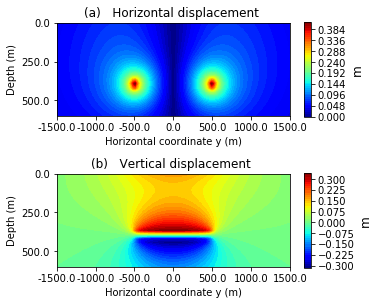

In [12]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(5.33,4.33))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement ")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement_non_uniform_depletion.png', dpi=600)

## DISPLACEMENT FIELD BY OUR METHODOLOGY: 
#### Reservoir under non uniform depletion: (a) Horizontal x-component displacement and (b) vertical displacement by our methodology that uses the closed expressions of the volume integrations given by Nagy et al. (2000) and Nagy et al. (2002). These displacements are calculated along the x-axis, at $y = 0 $ m and $z$ located at the depths of:  seafloor ($z = 0$ m), reservoir top ($z = 750$ m), reservoir center ($z = 800$ m) and reservoir bottom ($z = 850$ m).


In [13]:
# Define computation points
z_top = np.zeros(100) + 750
z_center = np.zeros(100) + 800
z_bottom = np.zeros(100) + 850
z_seafloor = np.zeros(100) 
x = np.linspace(0, 600, 100)
y = np.zeros_like(x)
coordinates_top = np.vstack([y, x, z_top])
coordinates_center = np.vstack([y, x, z_center])
coordinates_bottom = np.vstack([y, x, z_bottom])
coordinates_seafloor = np.vstack([y, x, z_seafloor])

### Compute the displacement components  along the x-axis, at $y = 0 $ m and $z$ located at the depths of:  seafloor ($z = 0$ m), reservoir top ($z = 750$ m), reservoir center ($z = 800$ m) and reservoir bottom ($z = 850$ m).

In [14]:
# Compute the x-component of displacement  at the top
displacement_x_top = cp.displacement_x_component(
    coordinates_top, model, DP, poisson, young
    )

# Compute the z-component of displacement  at the top
displacement_z_top = cp.displacement_z_component(
    coordinates_top, model, DP, poisson, young
    )

In [15]:
# Compute the x-component of displacement  at the center
displacement_x_center = cp.displacement_x_component(
    coordinates_center, model, DP, poisson, young
    )

# Compute the z-component of displacement  at the center
displacement_z_center = cp.displacement_z_component(
    coordinates_center, model, DP, poisson, young
    )

In [16]:
# Compute the x-component of displacement  at the bottom
displacement_x_bottom = cp.displacement_x_component(
    coordinates_bottom, model, DP, poisson, young
    )

# Compute the z-component of displacement  at the bottom
displacement_z_bottom = cp.displacement_z_component(
    coordinates_bottom, model, DP, poisson, young
    )

In [17]:
# Compute the x-component of displacement  at the seafloor
displacement_x_seafloor = cp.displacement_x_component(
    coordinates_seafloor, model, DP, poisson, young
    )

# Compute the z-component of displacement  at the seafloor
displacement_z_seafloor = cp.displacement_z_component(
    coordinates_seafloor, model, DP, poisson, young
    )

### Plot the results at the top, center and bottom of the reservoir

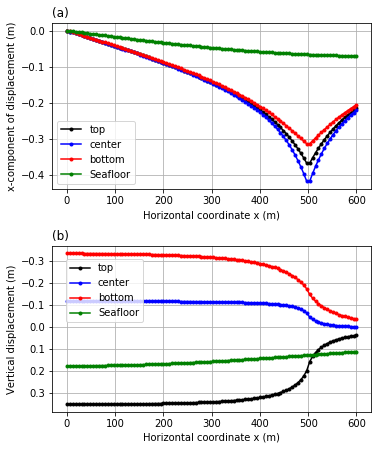

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(5.33, 6.33))

ax[0].plot(x, displacement_x_top, 'k.-', label='top')
ax[0].plot(x, displacement_x_center, 'b.-', label='center')
ax[0].plot(x, displacement_x_bottom, 'r.-', label='bottom')
ax[0].plot(x, displacement_x_seafloor, 'g.-', label='Seafloor')

ax[0].set_title('(a)', loc='left')
ax[0].set_xlabel("Horizontal coordinate x (m)") 
ax[0].set_ylabel("x-component of displacement (m)")
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(x, displacement_z_top, 'k.-', label='top')
ax[1].plot(x, displacement_z_center, 'b.-', label='center')
ax[1].plot(x, displacement_z_bottom, 'r.-', label='bottom')
ax[1].plot(x, displacement_z_seafloor, 'g.-', label='Seafloor')

ax[1].invert_yaxis()
ax[1].set_title('(b)', loc='left')
ax[1].set_xlabel("Horizontal coordinate x (m)") 
ax[1].set_ylabel("Vertical displacement (m)")
ax[1].grid()
ax[1].legend(loc='upper right', bbox_to_anchor=(0.3, 0.95))                                  
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Displacement_z_levels_non_uniform_depletion.png', dpi=600)

### THE STRESS FIELD BY OUR METHODOLOGY on plane z = 0 m


In [19]:
# Define computation points on the plane z = 0m
shape = (60, 60)
y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])
y, x = np.meshgrid(y, x)
y = y.ravel()
x = x.ravel()
z = np.zeros_like(x)
coordinates = np.vstack([y, x, z])

In [20]:
# Compute the x-component of stress
stress_x = cp.stress_x_component(coordinates, model, DP, poisson, young)

# Compute the y-component of stress
stress_y = cp.stress_y_component(coordinates, model, DP, poisson, young)

# Compute the z-component of stress
stress_z = cp.stress_z_component(coordinates, model, DP, poisson, young)

In [21]:
# horizontal component of stress
stress_horizontal = np.sqrt(stress_x**2 + stress_y**2)

### Plot the stress components on plane z = 0 m
### Reservoir under uniform depletion: (a) 𝑥−, (b) 𝑦−, and (c) 𝑧−components of the stress at the free surface¶

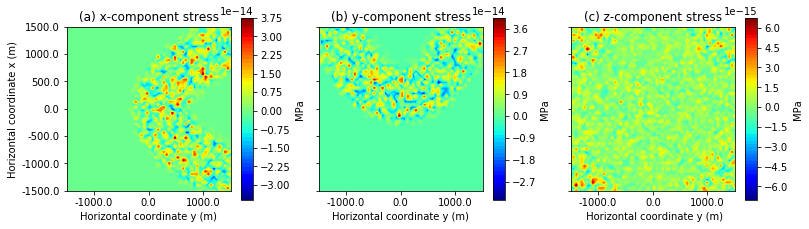

In [22]:
### Plot the results on plane z = 0 m

y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])

# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(11.33, 5.33))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, x, stress_x.reshape(shape), 
                  60, cmap="jet")

cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[0].set_title("(a) x-component stress")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Horizontal coordinate x (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, x, stress_y.reshape(shape),  
                  60, cmap="jet")

cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[1].set_title("(b) y-component stress")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].set_xlabel("Horizontal coordinate y (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, x, stress_z.reshape(shape),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[2], aspect=15, pad=0.05, shrink=0.5)
cb.set_label('MPa', rotation=90, fontsize=10)

ax[2].set_title("(c) z-component stress")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].set_xlabel(" Horizontal coordinate y (m)")


plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure_Null_stress_non_uniform_depletion.png', dpi=600)